# *Lecture 4*
# Numerical Integration 

| |
|:---:|
|Selected content [From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|


## Physics Introduction

<img src="Figures/CurrentLoop.png" width="30%">

Imagine that a current $I$ flows in a circular loop of wire of radius $R$.  The magnetic field for all of the points in the plane with $r<R$ is given by the formula

$$H(r) = \frac{4IR}{R^2 - r^2} \int_0^{\pi/2} \sqrt{1 - \left(\frac{r}{R}\right)^2 \sin^2\theta}\ d\theta$$

This complete elliptic integral of the second kind is no picnic.  Wolfram Alpha can do it, but the result may not be very enlightening:

$$H(r) \sim \left\{ 1 - \sum_{n=1}^{\infty} \left[\frac{(2n-1)!!}{(2n)!!}\right]^2 \frac{k^{2n}}{2n-1}\right\},$$

where $k$ is some argument depending on $r$ and $R$.

Of course this is an easy chore for numeric integration.

## Reminder of General Integration Formula

The numerical integral of a function $f(x)$ is approximated as the
equivalent of a finite sum over boxes of height $f(x)$ and weights
$w_i$:

$$
\int_{a}^{b} f(x)  dx \simeq \sum_{i=1}^{N} f(x_{i}) w_{i},$$

This is the standard form for all integration
algorithms; the function $f(x)$ is evaluated at $N$ points in the interval
$[a,b]$, and the function values 
$f_i \equiv f(x_i)$ are summed with each term in
the sum weighted by $w_i$. 

The different integration algorithms amount to
different ways of choosing the points $x_i$ and weights
$w_i$.

Here we show the two main methods for deriving the appropriate weights.  We will assume that the $x_i$ values are equally spaced on the interval $[a,b]$.
* Taylor expansion (this is what we used during the last lecture)
* System of equations

### Trapezoid Rule: Derivation 1 (Taylor Expansion)

The first method assumes an approximate form for $f(x)$ over the interval.  The form comes from the Taylor expansion about a point $x$:

$$f(x+h) \simeq f(x) + hf'(x) + \frac{h^2}{2!} f'' + \dots$$

We take just the first two terms, assuming that higher derivatives are 0.  (This is the same as assuming a first-order polynomial approximation for $f$.)

Then the integral over the subinterval $[-h,h]$ is split into two pieces, with the derivative recalculated for each piece, using the forward-difference algorithm:

$$\begin{align}
\int_{-h}^{h} f(x) dx & \simeq \int_{-h}^0 (f(0) - x f') dx + \int_0^h (f(0) + x f') dx \\
& = \int_{-h}^0 \left[f(0) - x \frac{f(0)-f(-h)}{h}\right] dx + \int_0^h \left[f(0) + x \frac{f(h)-f(0)}{h}\right] dx \\
& = hf(0) - \frac{f(0)-f(-h)}{h}\left[ -\frac{1}{2}h^2 \right] + hf(0) + \frac{f(h)-f(0)}{h} \left[ \frac{1}{2}h^2 \right] \\
&= hf_0 - \frac{1}{2}hf_0 + \frac{1}{2}hf_{-1} + hf_0 - \frac{1}{2}hf_0 + \frac{1}{2}hf_1 \\
\int_{-h}^{h} f(x) dx & \simeq \frac{h}{2}f_{-1} + hf_0 + \frac{h}{2}f_1
\end{align}
$$

This last line gives the local weights for that subinterval $[-h,h]$, and they match the results we showed last time for the "two-point trapezoid rule."

(Technically, we should write 
$$\int_0^h f(x) dx \simeq \frac{h}{2}f_0 + \frac{h}{2}f_1$$
for a single subinterval's local weights.)

The error in the approximation is $\mathcal{O}(h^2 f'')$, so the error in the integral is $\mathcal{O}(h^3)$.

If we had used the more accurate approximation

$$f(x+h) \simeq f(x) + hf'(x) + \frac{h^2}{2!} f'' + \dots$$

and used the midpoint algorithm for $f''$, then we would recover the "three-point Simpson's rule" instead.  

$$\int_{-h}^{h} f(x) dx \simeq \frac{h}{3}(f_{-1} + 4f_0 + f_1) + \mathcal{O}(h^5)$$

(Try it!)

As a reminder, here are the weights for uniform-step integration:

| Name | Degree | # of points (N) |     Elementary Weights     | 
|- - -|:- - -:|- - -| 
| Trapezoid| 1| 2|$(1,1)\frac{h}{2}$| 
| Simpson’s| 2| 3|$(1, 4, 1)\frac{h}{3}$| 
| Simpson's $\frac{3}{8}$| 3| 4|$(1, 3, 3, 1)\frac{3}{8}h$| 
| Milne/Boole| 4| 5| $(14,64,24,64,14)\frac{h}{45}$| 

We will return to this method when we introduce **Romberg integration**.

### Trapezoid Rule: Derivation 2 (System of Equations)

The second method solves for the weights directly, under the constraints that the integral be exact for the lowest-order integrands, starting with $f(x)=1$ and $f(x)=x$.
In this approach, we focus on the "closed formula" derivation, with the function evaluated at the endpoints of the interval (and at points in between).

$$I = \sum_{n=1}^N w_i f(x_i)$$

For the trapezoid rule (N=2 points, with $x_0=a$ and $x_1=b$), the explicit requirement of an exact integral for the simplest integrands gives the following system of linear equations:

$$\begin{align}
\int_{x_0}^{x_1} 1\ dx &= x_1 - x_0 &= w_0 + w_1 \\
\int_{x_0}^{x_1} x\ dx &= \frac{x_1^2-x_0^2}{2} &= w_0 x_0 + w_1 x_1\\
\end{align}$$

We can easily solve this system of linear equations to find
$$\begin{align}
w_0 &= \frac{x_1 - x_0}{2}\\
w_1 &= \frac{x_1 - x_0}{2}\\
\end{align}
$$

And, recalling that $h=b-a$, we can write

$$
\begin{align}
I &\cong w_0 x_0 + w_1 x_1 \\
&= \frac{x_1 - x_0}{2} f(x_0) + \frac{x_1 - x_0}{2}(f(x_1)\\
&= \frac{b-a}{2} f_0 + \frac{b-a}{2} f_1\\
I &= \frac{h}{2}\left( f_0 + f_1 \right) \\
\end{align}
$$

Notice that the local weights are again $h/2$ for the trapezoid rule.

For N=3 points, with $x_0$ and $x_2$ as the endpoints, we would write a system of 3 linear equations:

$$\begin{align}
\int_{x_0}^{x_2} 1\ dx &= x_2 - x_0 &= w_0 + w_1 + w_2 \\
\int_{x_0}^{x_2} x\ dx &= \frac{x_2^2-x_0^2}{2} &= w_0 x_0 + w_1 x_1 + w_2 x_2\\
\int_{x_0}^{x_2} x^2\ dx &= \frac{x_2^3-x_0^3}{3} &= w_0 x_0^2 + w_1 x_1^2 + w_2 x_2^2\\
\end{align}$$

and those weights lead to Simpon's rule.

As more points are included in the integration formula, the quadrature becomes exact for higher-order polynomials.  The drawback is that it becomes increasingly complicated to find the weights. 

We will return to this method when we introduce **Gaussian quadrature**.

### Return to the current loop

Now we can return to the integral from the beginning of the lecture.

$$H(r) = \frac{4IR}{R^2 - r^2} \int_0^{\pi/2} \sqrt{1 - \left(\frac{r}{R}\right)^2 \sin^2\theta}\ d\theta$$

To obtain a concrete answer for the magnetic field, we choose some values: $I=15.3$, $R=120.$, and $r=84.$.  Note that the choice $r<R$ puts this point inside the current loop.

In [1]:
import numpy as np

A = 0.
B = np.pi/2.
N = 1000

I = 15.3
R = 120.
r = 84.

# integrand
def f(theta):
    norm = (4*I*R)/(R**2-r**2)
    radical = 1. - (r/R)**2 * pow(np.sin(theta),2)
    return norm * np.sqrt(radical)

def wTrap(i, h):
    if ( (i == 1) or (i == N) ):
        wTotal = h/2.0
    else:
        wTotal = h
    return wTotal

h = (B - A)/(N - 1)
suma = 0.0

for i in range(1, N + 1):
    t = A + (i - 1)*h
    suma  = suma + wTrap(i, h) * f(t)
    
print('Final sum = ', suma)

Final sum =  1.3556611355719566


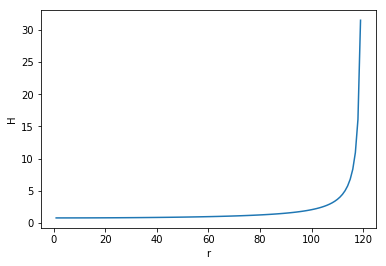

In [2]:
import numpy as np
import matplotlib.pyplot as plt

A = 0.
B = np.pi/2.
N = 1000
h = (B - A)/(N - 1)

I = 15.3
R = 120.

# integrand
def f(theta, r):
    norm = (4*I*R)/(R**2-r**2)
    radical = 1. - (r/R)**2 * pow(np.sin(theta),2)
    return norm * np.sqrt(radical)

def wTrap(i, h):
    if ( (i == 1) or (i == N) ):
        wTotal = h/2.0
    else:
        wTotal = h
    return wTotal

r_values = []
H_values = []
for r in np.linspace(1., 119., 119):
    #print(r)
    suma = 0.0
    for i in range(1, N + 1):
        t = A + (i - 1)*h
        suma  = suma + wTrap(i, h) * f(t, r)

    r_values.append(r)
    H_values.append(suma)

plt.plot(r_values, H_values)
plt.xlabel("r")
plt.ylabel("H")
plt.show()

Hmm, I wonder if the field ever goes to zero at the center of the loop... try it!

## Treatment of Singularities

In general you should not attempt a numerical integration of an integrand that
contains a singularity without first removing the singularity by hand.
You may be able to do this very simply by breaking the interval down into several
subintervals so the singularity is at an endpoint where an integration point is not
placed or by a change of variable:

$$
\int_{-1}^{1} f(|x|)  dx =  \int_{-1}^{0}f(-x)  dx +
\int_{0}^{1}f(x)  dx
$$

(Do not worry about missing out on the function at $x=0$. 
In numerical integration we do not evaluate the function at every point anyway.)

Likewise, if your integrand has a very slow variation in some region,
you can speed up the integration by changing to a variable that
compresses that region and places few points there, or divides up the
interval and performs several integrations. Conversely, if your
integrand has a very rapid variation in some region, you may want to
change to variables which expand that region to ensure that no
oscillations are missed.

$$
\begin{align}
\int_{0}^{1}\frac{f(x)  dx}{\sqrt{1-x^{2}}} &=
 \int_{0}^{1}\frac{f(1-y^{2})  dx}{\sqrt{1-(1-y^2)^{2}}}, \quad (y^{2}  =  1-x) \\
 &= \int_{1}^{0}\frac{f(1-y^{2})  (-2y dy)}{y\sqrt{2-y^2}}\\
 &= 2\int_{0}^{1}\frac{f(1-y^{2})  dy}{\sqrt{2-y^{2}}},
\end{align}
$$
   

In [3]:
# f1 is the original function
# f2 is the function after change of variables

import numpy as np

A = 0.0
B = 1.0
N = 1000000

def f1(x):  # original function, for reference
    return 1./(np.sqrt(1-pow(x,2)))

def f2(y):
    return 2*(1-pow(y,2))/np.sqrt(2-pow(y,2))

def wTrap(i, h):
    if ( (i == 1) or (i == N) ):
        wLocal = h/2.0
    else:
        wLocal = h
    return wLocal

h = (B - A)/(N - 1)
suma = 0.0

for i in range(1, N + 1):
    t = A + (i - 1)*h
    w = wTrap(i, h)
    suma  = suma + w * f2(t)

print('\n Final sum =', suma)


 Final sum = 0.9999999999996392


## Improper Integrals

We encounter integrals like 
$$I  = \int_0^\infty f(x) dx$$
fairly often in physics.
Our usual methods of subdividing the interval will not work well with an infinite interval.
You might argue that the $\infty$ is a formal upper limit, and most physical systems will not really have contributions at $\infty$.
The problem is that it is not always easy to define an upper limit $b$ beyond which the contributions become "negligible."

A different approach is to split the infinite interval into a finite region and an infinite region, with the choice of $a$ determined on a case-by-case basis:

$$\int_0^\infty f(x) dx = \int_0^a f(x) dx + \int_a^\infty f(x) dx$$

In this way, at least the integral over the finite region can be evaluated with the standard techniques, and often the integral over the infinite region can be handled more easily, too!

A common substitution of variables for the infinite region is $x\rightarrow 1/y$ so that the integral becomes

$$\int_a^\infty f(x)\ dx = \int_0^{1/a} \frac{f(y^{-1})}{y^2}\ dy$$

Notice that this change of variables would be disastrous if the region contained $x=0$, but luckily that point is contained in the finite region.

For example,
$$I = \int_0^\infty \frac{dx}{1+x^2}$$
cannot be evaluated with our usual techniques and arbitrarily large $b$.

In [11]:
import numpy as np

# Increase B to see the change in the integral
# Does it converge?
A = 0.0
B = 1000.0
N = 10000

def f(x):                               # The function being integrated
    return 1./(1+pow(x,2))

def g(y):
    return 2*(1-pow(y,2))/np.sqrt(2-pow(y,2))

def wTrap(i, h):                        # Function determines weight
    if ( (i == 1) or (i == N) ):
        wLocal = h/2.0
    else:
        wLocal = h
    return wLocal

def trap(A, B, N):
    h = (B - A)/(N - 1)
    suma = 0.0

    for i in range(1, N + 1):
        t = A + (i - 1)*h
        w = wTrap(i, h)
        suma  = suma + w * f(t)
    return suma

print("Final sum (with B=%d) = %f" % (B, trap(0, B, N)))

Final sum (with B=1000) = 1.569796


We will split this interval into two pieces: $[0,1]$ and $[1,\infty]$.
For the latter interval, we make the substitution $x\rightarrow 1/y$ and try $a=1$.

$$
\begin{align}
I &= \int_0^1 \frac{1}{1+x^2} dx + \int_0^{1/a} \frac{1}{y^2 (1+1/y^2)} dy \\
&= \int_0^1 \frac{1}{1+x^2} dx + \int_0^{1} \frac{1}{(y^2+1)} dy \\
&= \int_0^1 \frac{1}{1+x^2} dx + \int_0^{1} \frac{1}{1+y^2} dy \\
\end{align}
$$

In [7]:
import numpy as np

A = 0.0
B = 1.0
N = 100

def f(x):                               # The function being integrated
    return 1./(1+pow(x,2))

def wTrap(i, h):                        # Function determines weight
    if ( (i == 1) or (i == N) ):
        wLocal = h/2.0
    else:
        wLocal = h
    return wLocal

h = (B - A)/(N - 1)
suma = 0.0

for i in range(1, N + 1):
    t = A + (i - 1)*h
    w = wTrap(i, h)
    suma  = suma + w * f(t)

print('\n Final integral =', 2*suma)


 Final integral = 1.5707878242611426


$$I = \int_0^\infty \frac{dx}{1+x^2} = \frac{\pi}{2}$$

Looks pretty good!

## Romberg Integration

We return now to the calculation of higher-order approximations to the integral.
The Romberg integration scheme (defined in our book as "Romberg extrapolation") uses the same ideas as the Richardson extrapolation for differentiation.

The basic idea is to combine two different approximations in a way that cancels the leading terms of the error.

Let's imagine that we have a result obtained with the trapezoid rule, using $N=2^m$ intervals with width $h$.  Call this result $T_{m,0}$, with the second subscript indicating that this is a "zeroth-order" approximation.

$$T_{m,0} = \int_a^b f(x) dx + \alpha h^2 + \beta h^4 + \dots$$

Now let's rerun the trapezoid rule, using $N=2^{m+1}$ intervals with width $h/2$.
This result has 1/4 the error of the lower-resolution result.

$$T_{m+1,0} = \int_a^b f(x) dx + \alpha \frac{h^2}{4} + \beta \frac{h^4}{16} + \dots$$

We can cancel the leading error ($\mathcal{O}(h^2)$) and get a better integral approximation by subtracting the two results:

$$T_{m+1,1} = 4T_{m+1,0} - T_{m,0} = \int_a^b f(x) dx - \beta \frac{3h^4}{4} + \dots$$

(Note: the notation used in our book is 
$$\frac{4}{3}A\left(\frac{h}{2}\right)-\frac{1}{3}A\left(h\right) = \int_a^b f(x) dx - \beta \frac{h^4}{4} + \dots$$
but this does not lend itself to higher-orders.)

This result is mathematically equivalent to Simpson's rule, but we can get it by simply repeating the trapezoidal (2-point) integration instead of the 3-point integration of Simpson's rule.

If we compare this Simpson's rule approximation $T_{m+1,1}$ with the next level of the same error order $T_{m+2,1}$ (with the interval halved again), the error in $T_{m+2,1}$ will be 1/16 as large.  We subtract again to eliminate the leading error term (now $\mathcal{O}(h^4)$:

$$T_{m+2,2} = \frac{16T_{m+2,1} - T_{m+1,1}}{15} = \int_a^b f(x) dx - \gamma h^6 + \dots$$

and now this is much better than Simpson's rule (error is $h^6$ instead of $h^4$).

We can continue in this way as long as we like.  The general form for any $k$ is 

$$T_{m+k,k} = \frac{4^k T_{m+k,k-1} - T_{m+k-1,k-1}}{4^k-1}$$

The $T$ reminds us that these are all simple trapezoidal integrations.
Since it is complicated to keep calculating the coefficients of the leading error terms, it is common to stop the iterations when the integral is no longer changing significantly relative to its value.

The implementation of the Romberg integration is left as an exercise.

## Gaussian Quadrature

Now we come to an almost magical numerical integration method.
It is technically possible to calculate the integral of an arbitrary function exactly by evaluating the function at a single point!  Of course, you have to find the "magic point."

For example, if $f(x)=c$ (a zeroth-order polynomial), then we can evaluate the function at $x=0.5$:
$$\int_0^1 f(x) dx = f(0.5) (1-0) = c,$$
where we have used $h = b-a = 1-0$.  

For the zeroth-order polynomial, you can pick any point and get the same answer.

Even for $f(x) = 2x$ (a first-order polynomial),
$$\int_0^1 f(x) dx = f(0.5) (1-0) = 1$$
The trick is to find the right place (this is for $N=1$, a single point) to evaluate the function.
You cannot find a single "right place" to evaluate a second-order polynomial and approximate the integral for any $x$ value; you need at least two points for the second-order polynomial function.

In the **Gaussian quadrature approach to integration**, the $N$ points and
weights are chosen to make the integration exact if $f(x)$
were a ($2N − 1$)-degree polynomial. To obtain this incredible
optimization, the points $x_i$ end up having a specific
distribution over $[a,b]$.  They are *no longer equally spaced*.  

Let's calculate the points and the weights for $N=2$, which we expect to give exact answers for polynomials up to order 3.  We should have $2N$ unknowns (the weights $w_i$ and points $x_i$) and $2N$ constraint equations.

The constraint equations come from writing 
$$\int_a^b f(x)\, dx \cong \sum_{i=1}^N w_i f(x_i)$$
for the first $2N-1$ polynomial orders:

$$
\begin{align}
f(x) = const. & \longrightarrow \quad &(b-a) &= w_1 + w_2 \\
f(x) = x & \longrightarrow \quad & \frac{b^2-a^2}{2} &= w_1 x_1 + w_2 x_2 \\
f(x) = x^2 & \longrightarrow \quad & \frac{b^3-a^3}{3} &= w_1 x_1^2 + w_2 x_2^2 \\
f(x) = x^3 & \longrightarrow \quad & \frac{b^4-a^4}{4} &= w_1 x_1^3 + w_2 x_2^3 \\
\end{align}
$$

Note that any finite interval $[a,b]$ can be mapped onto the convenient interval $[-1,1]$ through a simple change of variables.
All of the Gaussian weights and points are calculated and tabulated with this assumption.
We can rewrite the system of constraint equations accordingly (using our book's notation for the abcissa values in the normalized interval $[-1, 1]$):

$$
\begin{align}
2 &= w_1 + w_2 \\
0 &= w_1 z_1 + w_2 z_2 \\
\frac{2}{3} &= w_1 z_1^2 + w_2 z_2^2 \\
0 &= w_1 z_1^3 + w_2 z_2^3 \\
\end{align}
$$

The solutions are $w_1=w_2=1$ and $z_1=1/\sqrt{3}, z_2=-1/\sqrt{3}$.  These $z$ values are the points I referred to as the "magic points" earlier.

* Don't forget: these $z$ values are in the *normalized* interval ("$z$-space"), so you need to undo the transform to get them back into "$x$-space".
* Exercise: what are the correct values $x_1$ and $x_2$ in "$x$-space?"

In contrast to the equally spaced rules, there is never an integration
point at the extremes of the intervals, yet the values of the points and weights
change as the number of points $N$ changes, and the points are not spaced
equally.

**Exercise**: calculate 
$$\int_0^2 (3x^2+2x+1) dx$$
by using $N=2$ Gaussian quadrature weights and values.

In [34]:
import numpy as np
w = np.zeros(2)
x = np.zeros(2)

def f(x):
    return (3*pow(x,2) + 2*x + 1)

# Calculates weights and values after mapping onto -1,1
def gauss(npts, a, b, x, w):
    if (npts==2):
        x[0],x[1] = 1./np.sqrt(3), -1./np.sqrt(3)
        w[0],w[1] = 1.0, 1.0
    for i in range(0, npts):
        x[i] = x[i]*(b - a)/2. + (b + a)/2. 
        w[i] = w[i]*(b - a)/2. 
    
def gaussint (npts, min, max):
    quadra = 0.  
    gauss (npts, min, max, x, w)        # Returns pts & wts
    print("points are", x)
    print("weights are", w)
    for n in np.arange(0, npts):
        quadra += f(x[n]) * w[n]        # Calculate integral
    return (quadra)

print("Integral with Gaussian quadrature is", gaussint(2,0.0,2.0))

points are [1.57735027 0.42264973]
weights are [1. 1.]
Integral with Gaussian quadrature is 14.0


Now try adding the weight for $N=1$ and test with a suitable function.

For ordinary Gaussian (technically known as Gauss-Legendre) integration,
the points $y_i$ turn out to be the $N$ zeros of the
Legendre polynomials, with the weights related to the derivatives,

$$P_{N}(y_{i}) = 0, \qquad w_{i} = \frac{2}{(1-y_{i}^{2}) [P_{N}^{'}
(y_{i}]^{2}}.$$

Programs to generate these points and weights are standard in
mathematical function libraries.  They are also found in tables such as those in
"Abramowitz & Stegun," (now superseded by [NIST Digital Library of Mathematical Functions](https://dlmf.nist.gov)).

If you use the standard pre-computed Gaussian weights and x-values, the main work in Gaussian integration is mapping the $y$ interval
$[−1 \leq y \leq 1]$ onto the $x$ interval
$[a \leq x \leq b]$, as seen in the program above.

*Beware* that copying the pre-computed values is subject to mistakes and typos.  The best way to check that you have everything entered correctly is to test your integration code on a known integral.  If you find $\int_0^1 x\ dx = 0.56843235$, then something is wrong!

### Gaussian Points Derivation

We want to perform a numerical integration with $N$ integration points:

$$\int_{-1}^{+1}f(x)\ dx = \sum_{i=1}^N w_i f(x_i)$$

where $f(x)$ is a polynomial of degree 2N-1 or less. (Even though we used $y$ instead of $x$ for the normalized interval to give some clarity, we now switch back to $x$ for all of the equations.)

The unique
property of Gaussian quadrature is that this equality will be exact, as long as
we ignore the effect of round-off error. 
Determining the
$x_i$ and $w_i$ requires some knowledge of
special functions. The knowledge
needed is the two properties of Legendre polynomials
$P_N(x)$ of order $N$:

1.  $P_N$ is orthogonal to every polynomial of order
    less than $N$.

2.  $P_N(x)$ has $N$ real roots (zeros) in the interval
    $[−1 \leq x \leq 1]$.

We define now a new polynomial of degree equal to or less than $N$
obtained by dividing the integrand $f(x)$ by the Legendre polynomial
$P_N$:

$$\begin{align} q(x) & = \frac{f(x)} {P_{N}(x)},\\
\Rightarrow \quad f(x) & = q(x)P_N(x) + r(x). \end{align}$$

Here the remainder $r(x)$ is an (unknown) polynomial of degree $N$ or
less, which we will not need to determine. If we substitute and use the fact that $P_N$ is orthogonal to
every polynomial of degree less than or equal to $N$, only the second,
$r(x)$, term remains:

$$\int_{-1}^{+1}f(x) dx = \int_{-1}^{+1}q(x)P_N(x) dx + \int_{-1}^{+1}r(x) dx =
\int_{-1}^{+1}r(x) dx.$$

Yet because $r(x)$ is a polynomial of degree $N$ or less, we can use a
standard $N$ point rule to evaluate the integral exactly (the type of
quadrature we did with the Simpson rule).

Now that we know it is possible to integrate a $2N-1$ or less degree
polynomial with just $N$ points, we exert some cleverness to determine
just what those points will be. We substitute and
note that

$$
\int_{-1}^{+1}f(x) dx  =\sum_{i=1}^N w_i  q(x_i)P_N(x_i)  +\sum_{i=1}^N w_i  r(x_i) =\sum_{i=1}^N w_i  r(x_i) .$$

The cleverness is realizing that if we choose the $N$ integration points
to be the zeros or roots of the Legendre polynomial
$P_N(x)$, then the first term on the RHS will
vanish because $P_N(x_i)=0$ for each
$x_i$:

$$
\int_{-1}^{+1}f(x) dx  = \sum_{i=1}^N w_i  r(x_i)   .$$

This is our derivation that the $N$ integration points over the interval
$(-1, 1)$ are the $N$ zeros of the Legendre polynomial
$P_N(x)$. 

The actual derivation of the weights depends on the special $(N-1)$th-order polynomial defined as

$$l_{i,N}(x) = \frac{(x-x_1)\cdots(x-x_{i-1})(x-x_{i+1})\cdots(x-x_N)}{(x_i-x_1)\cdots(x_i-x_{i-1})(x_i-x_{i+1})\cdots(x_i-x_N)}$$

The beauty of this polynomial is that it satisfies
$$
l_{i,N}(x_j) = \begin{cases} 0, \quad j\neq i \\ 1, \quad j=i \end{cases}
$$

This is very handy to calculate the weights used in our general equation for integration:
$$
\int_a^b l_{i,N}(x)\ dx = \sum_{m=1}^N w_m l_{i,N}(x_m) = w_i
$$

### Example: Weights for $N=2$

To prove that this actually works, calculate the weights for $N=2$ Gaussian quadrature.  

We assume that $x_1=-\frac{1}{\sqrt{3}}$ and $x_2=\frac{1}{\sqrt{3}}$ on the normalized interval $[-1,1]$.  Let's just use that interval.

Then the weights are calculated according to the formula above:
$$\begin{align}
w_1 &= \int_{-1}^1 l_{1,N}\ dx \\
&= \int_{-1}^1 \frac{x-x_2}{x_1-x_2}\ dx \\
&= \frac{1}{x_1-x_2} \left[ \frac{x^2}{2} - x_2 x\right]_{-1}^1 \\
&= \frac{-2 x_2}{x_1-x_2} \\
&= \frac{-2 \frac{1}{\sqrt{3}}}{-2\frac{1}{\sqrt{3}}} \\
w_1 &= 1
\end{align}
$$

This is the same solution we found in the system of linear equations!
For $N=2$, the complication is about the same, but for $N>3$ the method of Legendre polynomials is preferred.

### Final Word on Gaussian Quadrature

The most interesting thing about Gaussian quadrature is **not** that it can integrate 5th-order polynomials exactly.  (You can do that by hand.)

The most interesting thing is that the proper placement of points improves the accuracy of the numerical integration for any function.  Since the lowest-order terms in the Taylor expansion typically dominate, an integration method that integrates those terms perfectly will be more accurate than one that neglects all terms above $N=1$.  (We're looking at you, trapezoid rule!)


## Integration Error Assessment

For finite integrals (or for improper integrals with appropriate transformations), the error is best computed as a running relative error.

Usually the relative error is defined as "(numerical-exact)/exact," but sometimes we do not know the exact value.  In those cases, we can hope that we are approaching the exact value with our approximations.  We can define our relative error as "(`this_iteration`-`previous_iteration`)/`this_iteration`."  We divide by `this_iteration` because of our assumption that we are approaching the exact value.

As with all numerical algorithms, the integration algorithms stop converging when round-off error starts to dominate.  The desired accuracy should be set with the round-off error in mind.

If you just need the precision to "N decimal places," then the appropriate metric is the difference (`this_iteration`-`previous_iteration`).  This will give you the correct absolute precision regardless of the result's magnitude.